In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv("muscle_labs.csv",parse_dates=['start_date','end_date'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10497 entries, 0 to 10496
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   10497 non-null  int64         
 1   customer_id          10497 non-null  int64         
 2   end_date             10497 non-null  datetime64[ns]
 3   start_date           10497 non-null  datetime64[ns]
 4   subscription_period  10497 non-null  object        
 5   price                10497 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 492.2+ KB


In [4]:
df.subscription_period.unique()

array(['monthly', 'annual'], dtype=object)

In [5]:
df.sample(20)

,id,customer_id,end_date,start_date,subscription_period,price
2567,26996,4155,2015-05-10 16:15:00,2012-05-10 16:15:00,annual,500
8252,13444,10255,2015-12-04 14:29:00,2013-12-02 02:29:00,annual,500
7845,26684,9753,2014-02-28 07:00:00,2014-01-30 08:07:00,monthly,50
8305,13626,10309,2015-01-31 08:50:00,2014-01-27 23:22:00,annual,500
6787,24928,8700,2013-06-15 22:42:00,2012-12-15 22:42:00,monthly,50
6008,14711,7912,2015-04-27 22:50:00,2014-04-25 10:50:00,annual,500
788,17296,2287,2015-10-10 14:36:00,2014-10-08 02:36:00,annual,500
4139,17554,5884,2014-12-22 22:25:00,2014-08-20 10:25:00,monthly,50
7100,16474,9001,2015-12-05 03:54:00,2013-12-02 15:54:00,annual,500
8879,16495,10886,2015-09-04 09:43:00,2014-09-01 21:43:00,annual,500


In [6]:
startYear = df['start_date'].dt.year
startMonth = df['start_date'].dt.month
startDate = startYear*100+startMonth
startDate

0        201410
1        201410
2        201410
3        201312
4        201411
          ...  
10492    201409
10493    201410
10494    201411
10495    201411
10496    201409
Name: start_date, Length: 10497, dtype: int64

In [7]:
endYear = df['end_date'].dt.year
endMonth = df['end_date'].dt.month
endDate = endYear*100+endMonth

In [8]:
endDate.max()

201512

In [9]:
df['StartYear'] = startDate
df['EndDate'] = endDate

In [10]:
df.head()

,id,customer_id,end_date,start_date,subscription_period,price,StartYear,EndDate
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50,201410,201412
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50,201410,201411
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500,201410,201411
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500,201312,201412
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500,201411,201511


In [11]:
end = df.groupby('EndDate')['customer_id'].agg('count')

In [12]:
start = df.groupby('StartYear')['customer_id'].agg('count')

In [13]:
results = pd.merge(left=start,right = end,how='inner',left_on=start.index,right_on=end.index)

In [14]:
results.columns = ['YearMonth','Joined','Left']

In [15]:
results.fillna(0,inplace=True)
results['Joined']=results.Joined.astype(int)
results['Left'] =results.Left.astype(int)
results

,YearMonth,Joined,Left
0,201103,43,8
1,201104,39,16
2,201105,79,29
3,201106,66,27
4,201107,63,37
5,201108,67,40
6,201109,46,39
7,201110,66,47
8,201111,113,45
9,201112,58,100


In [16]:
results['Churned%'] =round((results['Left']/ results['Joined'])*100,2)

ValueError: too many values to unpack (expected 2)

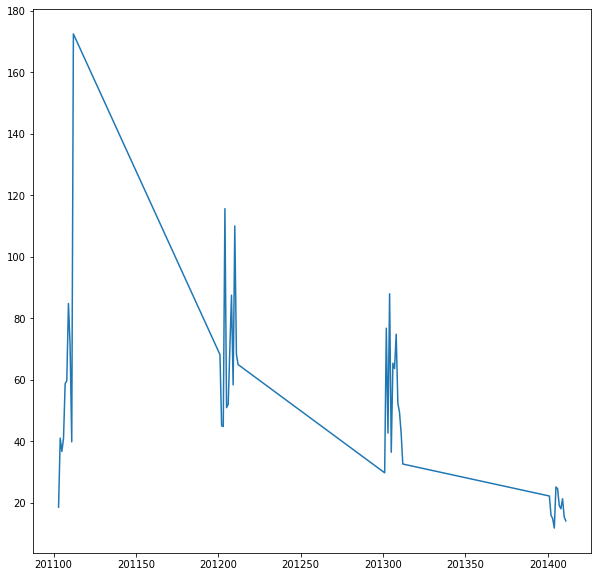

In [33]:
plt.figure(figsize=(10,10))
plt.plot(results['YearMonth'],results['Churned%'])
plt.xlim(results.index)
plt.plot()